##### Preamble and Function Definitions


In [1]:
from numpy import ones,copy,cos, sin, tan, pi, linspace, exp
from math import sqrt
import matplotlib.pyplot as plt

def gaussChevy(theta, n):
    kVal = k(theta)
    sum = 0.0
    for i in range(1,n+1):
        x = cos(pi*(i - 0.5)/n)
        f = 1 / sqrt(1- kVal**2 * x**2)
        sum += f*pi/n
    return sum

def gaussxw(N):
    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0

    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)

        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

        # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)
    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

def gaussLeg(Nmax, a, b, funct):
    for n in range(3, Nmax + 1):
        x,w = gaussxw(n)
        xp = 0.5*(b-a)*x + 0.5*(b+a)
        wp = 0.5*(b-a)*w

        # Perform integration
        evaluation=0.0
        for i in range(n):
            evaluation+=wp[i]*funct(xp[i])

    return evaluation

# 1) Knife-Edge Diffraction
Knife-edge diffraction occurs when an incoming plane wave is partially blocked by a straight edge. $\frac{I}{I_0}$, the ratio between intensities before and after the straight edge, at the point $P(x,z)$ is given by $\frac{I}{I_0}=\frac{1}{8}\left([2C(u)+1]^2 + [2S(u)+1]^2\right)$, where $u=x\sqrt{\frac{2}{\lambda z}}$, $C(u)=\int_0^u \cos\left(\frac{\pi t^2}{2}\right)dt$, and $S(u)=\int_0^u\sin\left(\frac{\pi t^2}{2}\right)dt$.

##### Calculate $\frac{I}{I_0}$ with Gauss-Legendre quadrature

In [2]:
def C(u):
    return gaussLeg(50, 0, u, lambda x: cos(pi * x**2 / 2))

def S(u):
    return gaussLeg(50, 0, u, lambda x: sin(pi * x**2 / 2))
    
def uFunct(x,z,lam):
    return x * sqrt(2/(lam * z))

def intensityRatio(x,z,lam):
    u = uFunct(x,z,lam)
    intensityRatio = (1/8) * ( (2*C(u) + 1)**2 + (2*S(u) + 1)**2 )
    return intensityRatio

##### With $\lambda=1$, plot $\frac{I}{I_0}(x)$ for $x\in(-2,4)$. Compare at $z=\{1,5\}$. What N value is necessary to obtain accurate Gaussian quadrature results?

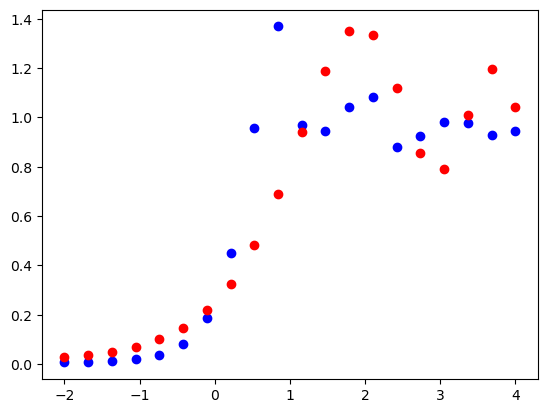

In [3]:
xVal = linspace(-2, 4, 20)
zVal = [1, 5]
lam = 1

for x in xVal:
    for i in range(len(zVal)):
        z = zVal[i]
        ratio = intensityRatio(x,z,lam)
        
        if i % 2 == 0:
            plt.scatter(x, ratio, color="blue")
        else:
            plt.scatter(x, ratio, color="red")

# 2) Plane Pendulum
The period of a length $L$ plane pendulum is given by the eliptical integral of the first kind, $T=2\sqrt{\frac{L}{g}}\int_{-1}^{1}\frac{1}{\sqrt{1-x^2}\sqrt{1- k^2 x^2}}dx$ where $g$ is the gravitational acceleration and $k$ depends on the maximum penudum angle, $\theta_0$, such that $k=\sin\left(\frac{\theta_0}{2}\right)$.

##### Using Gauss-Chebyshev, write a program to calculate T.

In [4]:
def k(theta):
    return sin(theta / 2)

def pendPeriod(N,L,g, theta):
    T = 2 * sqrt(L/g) * gaussChevy(theta, N)
    return T

##### What value of N is large enough to achieve a T error $<10^{-6}$.  Does this value depend on $\phi_0$?

###### Strategy: Calculate high N (high precision) reference solution and test range of values until error tolarance is reached. Only 4 iterations are necessary for the integration to converge to this precision.

In [5]:
theta = pi / 6 # Arbitrary value
highPrecisionEst = pendPeriod((10**6), 1, 1, theta)
errorTolerance = 10 ** (-6)
L = 1
g = 1

for i in range(0,50,1):
    estimate = pendPeriod(i, L, g, theta)
    error = abs(highPrecisionEst - estimate)
    if error < errorTolerance:
        print(i)
        break

4


##### Plot $T(\theta_0)$
##### Plot $\frac{T}{T_s}$ showing how much the solution differs from the small oscillation result.
###### Assuming small angles, $T$ reduces to $T_S=2\pi\sqrt{\frac{L}{g}}$, a constant value.

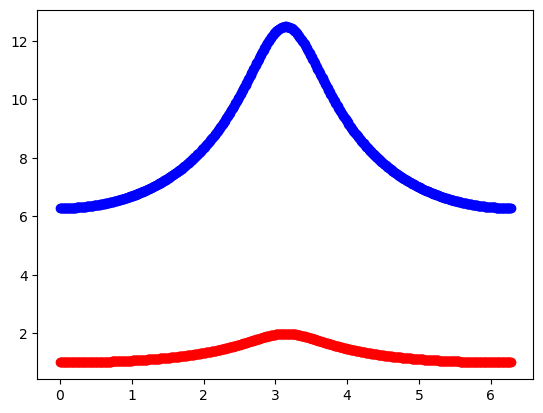

In [6]:
thetaList = linspace(0, 6.28, 628) # Angle measurements around a circle
smallAngleApprox = pendPeriod(5, 1, 1, 0.001)

for i in range(len(thetaList)):
    period = pendPeriod(5, L, g, thetaList[i])
    plt.scatter(thetaList[i],period, color="blue")

    plt.scatter(thetaList[i], period/smallAngleApprox, color="red")

# 3) Differentiation
Estimate $\frac{d}{dx} e^{x}|_{x_0}$ for $x_0=\{0.1,10,100\}$ using the 2-point forward and 3-point central difference formulas.

In [7]:
def f(x):
    return exp(x)
    
def twoPtForward(x0, deltaX):
    return (f(x0+deltaX) - f(x0)) / deltaX

def threePtCentral(x0, deltaX):
    return (f(x0+deltaX) - f(x0-deltaX)) / (2*deltaX)
    
x0 = [0.1, 10, 100]
for x in x0:
    exact = exp(x)
    print(f"Exact derivative evaluation for x={x} is {exact}")

    twoPtEval = twoPtForward(x, 1e-5)
    print(f"2-pt forward difference for x={x} is {twoPtEval}")
    
    threePtEval = threePtCentral(x, 1e-5)
    print(f"3-pt central difference for x={x} is {threePtEval}\n")

Exact derivative evaluation for x=0.1 is 1.1051709180756477
2-pt forward difference for x=0.1 is 1.1051764439384826
3-pt central difference for x=0.1 is 1.1051709180920355

Exact derivative evaluation for x=10 is 22026.465794806718
2-pt forward difference for x=10 is 22026.57592642936
3-pt central difference for x=10 is 22026.46579426073

Exact derivative evaluation for x=100 is 2.6881171418161356e+43
2-pt forward difference for x=100 is 2.6881305832735226e+43
3-pt central difference for x=100 is 2.688117142710928e+43



# Plot the absolute value of the relative error in the derivative as a function of h on a log-log plot
###### Strategy: Start with $h=1$ and iterativly decrease by half until round-off noticable 

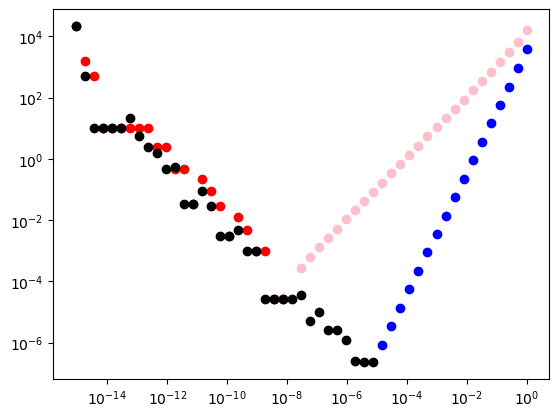

In [17]:
hVal = [1]
x=10
exact = exp(x)
for i in range(50):
    h = hVal[-1]/2
    hVal.append(h)

with open('errorTwoPtForward.dat', 'w') as fileTwoPt:
    with open('errorThreePtCentral.dat', 'w') as fileThreePt:
        for h in hVal:
            approx = twoPtForward(x, h)
            errorTwoPtForward = abs(exact - approx)
            plt.xscale('log')
            plt.yscale('log')

            if h < 1e-8:
                plt.scatter(h, errorTwoPtForward, color="red")
                fileTwoPt.write(f'{h} {errorTwoPtForward}\n')
            else: 
                plt.scatter(h, errorTwoPtForward, color="pink")
                fileTwoPt.write(f'{h} {errorTwoPtForward}\n')

            approx = threePtCentral(x, h)
            errorThreePtCentral = abs(exact - approx)
            
            if h > 1e-5:
                plt.scatter(h, errorThreePtCentral, color="blue")
                fileThreePt.write(f'{h} {errorThreePtCentral}\n') 
            else:
                plt.scatter(h, errorThreePtCentral, color="black")
                fileThreePt.write(f'{h} {errorThreePtCentral}\n') 

In the above plot, red represents the round-off dominant region of the 2-pt forward difference formula, with the approximation error dominant region plotted in pink. The black reprsents the round-off dominant region of the 3-pt central difference formula with the approximation error dominant region in blue. From graphical inspection, we may determine that the 2-ptforward-difference formula optimal $h$ occurs in the order of $10^{-8}$. The 3-pt central difference occurs in the order of $10^{-5}$.


# Graduate Work
Regression polynomials are as follows:

2-pt forward-difference

Round off: 
Approximation error:

3-pt central difference

Round off:
Approximation error:

![Error Analysis](./errorAnalysis.png)